## Count ways to reach the Nth Stairs

You have been given a number of stairs. Initially, you are at the 0th stair, and you need to reach the Nth stair.



Each time, you can climb either one step or two steps.



You are supposed to return the number of distinct ways you can climb from the 0th step to the Nth step.

Example :
N=3

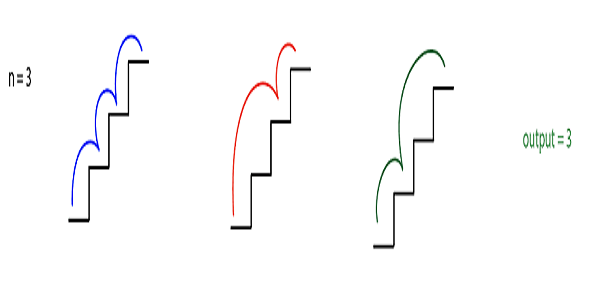

We can climb one step at a time i.e. {(0, 1) ,(1, 2),(2,3)} or we can climb the first two-step and then one step i.e. {(0,2),(1, 3)} or we can climb first one step and then two step i.e. {(0,1), (1,3)}.

In [ ]:
#stepcount should be stored after taking modulus of 1000000007

class Helper:
  def __init__(self):
    #permanently stores number of ways for each step
    self.stepcount = [1, 1, 2]
    self.mod = 1000000007

h = Helper()

def countDistinctWays(nStairs):
  #until how many steps do we currently have data for?
  current_max_stair = len(h.stepcount) - 1
  #simply return data, if we already have it
  if nStairs < current_max_stair:
    return h.stepcount[nStairs]
  #else calculate data for each step from current max step to nStairs
  for step in range(current_max_stair + 1, nStairs + 1):
    h.stepcount.append((h.stepcount[step - 1] + h.stepcount[step - 2]) % h.mod)

  return h.stepcount[nStairs]

## Frog Jump

There is a frog on the '1st' step of an 'N' stairs long staircase. The frog wants to reach the 'Nth' stair. 'HEIGHT[i]' is the height of the '(i+1)th' stair.If Frog jumps from 'ith' to 'jth' stair, the energy lost in the jump is given by absolute value of ( HEIGHT[i-1] - HEIGHT[j-1] ). If the Frog is on 'ith' staircase, he can jump either to '(i+1)th' stair or to '(i+2)th' stair. Your task is to find the minimum total energy used by the frog to reach from '1st' stair to 'Nth' stair.

For Example
If the given ‘HEIGHT’ array is [10,20,30,10], the answer 20 as the frog can jump from 1st stair to 2nd stair (|20-10| = 10 energy lost) and then a jump from 2nd stair to last stair (|10-20| = 10 energy lost). So, the total energy lost is 20.

In [ ]:
from typing import *

def frogJump(n: int, heights: List[int]) -> int:
  dp = [-1] * (n+1)
  dp[n] = 0
  dp[n-1] = abs(heights[n-1] - heights[n-2])
  for i in range(n-2, 0, -1):
    dp[i] = min(dp[i+1] + abs(heights[i-1] - heights[i]),
                dp[i+2] + abs(heights[i-1] - heights[i+1]))

  return dp[i]

## Maximum Sum of non-adjacent elements

You are given an array/list of ‘N’ integers. You are supposed to return the maximum sum of the subsequence with the constraint that no two elements are adjacent in the given array/list.

Note:
A subsequence of an array/list is obtained by deleting some number of elements (can be zero) from the array/list, leaving the remaining elements in their original order.

In [ ]:
from sys import stdin

# Function to solve the problem of finding the maximum sum of non-adjacent elements in an array
def solve(n, arr):
    # Initialize variables to keep track of the previous maximum and the one before that
    prev = arr[0]  # Initialize with the first element of the array
    prev2 = 0      # Initialize with 0 because there is no element before the first

    # Loop through the array starting from the second element
    for i in range(1, n):
        # Calculate the maximum value when picking the current element
        pick = arr[i]

        # Check if there are at least two elements before the current element
        if i > 1:
            pick += prev2

        # Calculate the maximum value when not picking the current element
        non_pick = 0 + prev

        # Calculate the maximum value for the current index
        cur_i = max(pick, non_pick)

        # Update the 'prev' and 'prev2' variables for the next iteration
        prev2 = prev
        prev = cur_i

    # Return the maximum value for the last index, which represents the solution
    return prev

# Main
t = int(stdin.readline().rstrip())

while t > 0:

    n = int(stdin.readline().rstrip())
    arr = list(map(int, stdin.readline().rstrip().split(" ")))
    print(solve(n, arr))

    t -= 1

## House Robber 2

Mr. X is a professional robber planning to rob houses along a street. Each house has a certain amount of money hidden.



All houses along this street are arranged in a circle. That means the first house is the neighbour of the last one. Meanwhile, adjacent houses have a security system connected, and it will automatically contact the police if two adjacent houses are broken into on the same night.



You are given an array/list of non-negative integers 'ARR' representing the amount of money of each house. Your task is to return the maximum amount of money Mr. X can rob tonight without alerting the police.



Note:
It is possible for Mr. X to rob the same amount of money by looting two different sets of houses. Just print the maximum possible robbed amount, irrespective of sets of houses robbed.


For example:
(i) Given the input array arr[] = {2, 3, 2} the output will be 3 because Mr X cannot rob house 1 (money = 2) and then rob house 3 (money = 2), because they are adjacent houses. So, he’ll rob only house 2 (money = 3)

(ii) Given the input array arr[] = {1, 2, 3, 1} the output will be 4 because Mr X rob house 1 (money = 1) and then rob house 3 (money = 3).

(iii) Given the input array arr[] = {0} the output will be 0 because Mr. X has got nothing to rob.

In [ ]:
def solve(arr):
    n = len(arr)
    prev = arr[0]
    prev2 = 0

    for i in range(1, n):
        pick = arr[i]
        if i > 1:
            pick += prev2
        nonPick = 0 + prev

        cur_i = max(pick, nonPick)
        prev2 = prev
        prev = cur_i

    return prev

def houseRobber(arr):
    n = len(arr)
    arr1 = []
    arr2 = []

    if n == 1:
        return arr[0]

    for i in range(n):
        if i != 0:
            arr1.append(arr[i])
        if i != n - 1:
            arr2.append(arr[i])

    ans1 = solve(arr1)
    ans2 = solve(arr2)

    return max(ans1, ans2)

## Unique Paths 2

Given a ‘N’ * ’M’ maze with obstacles, count and return the number of unique paths to reach the right-bottom cell from the top-left cell. A cell in the given maze has a value '-1' if it is a blockage or dead-end, else 0. From a given cell, we are allowed to move to cells (i+1, j) and (i, j+1) only. Since the answer can be large, print it modulo 10^9 + 7.

For Example :
Consider the maze below :
0 0 0
0 -1 0
0 0 0

There are two ways to reach the bottom left corner -

(1, 1) -> (1, 2) -> (1, 3) -> (2, 3) -> (3, 3)
(1, 1) -> (2, 1) -> (3, 1) -> (3, 2) -> (3, 3)

Hence the answer for the above test case is 2.

In [ ]:
#result has to me mod 1000007

def mazeObstaclesUtil(i, j, maze, dp):
    # Base case: If we are out of bounds or at an obstacle, return 0.
    if i < 0 or j < 0 or maze[i][j] == -1:
        return 0

    # Base case: If we reach the starting point, return 1 (we found a path).
    if i == 0 and j == 0:
        return 1

    # If we've already computed the number of paths for this position, return it.
    if dp[i][j] != -1:
        return dp[i][j]

    # Move up and left in the maze, and recursively calculate the number of paths.
    up = mazeObstaclesUtil(i - 1, j, maze, dp)
    left = mazeObstaclesUtil(i, j - 1, maze, dp)

    # Store the result in the DP table and return it.
    dp[i][j] = up + left
    return dp[i][j] % 1000000007

def mazeObstacles(n, m, maze):
    # Create a DP table initialized with -1 values.
    dp = [[-1 for j in range(m)] for i in range(n)]

    # Call the utility function to find the number of paths.
    return mazeObstaclesUtil(n - 1, m - 1, maze, dp)

## Triangle

You are given a triangular array/list 'TRIANGLE'. Your task is to return the minimum path sum to reach from the top to the bottom row.

The triangle array will have N rows and the i-th row, where 0 <= i < N will have i + 1 elements.

You can move only to the adjacent number of row below each step. For example, if you are at index j in row i, then you can move to i or i + 1 index in row j + 1 in each step.

For Example :
If the array given is 'TRIANGLE' = [[1], [2,3], [3,6,7], [8,9,6,1]] the triangle array will look like:

1
2,3
3,6,7
8,9,6,10

For the given triangle array the minimum sum path would be 1->2->3->8. Hence the answer would be 14.

In [ ]:
def minimumPathSum(triangle, n):

    # Create a 2D array dp to store minimum path sums
    dp = [[0 for j in range(n)] for i in range(n)]

    # Initialize the bottom row of dp with the values from the last row of the triangle
    for j in range(n):
        dp[n - 1][j] = triangle[n - 1][j]

    # Start from the second-to-last row and work upwards
    for i in range(n - 2, -1, -1):
        for j in range(i, -1, -1):
            # Calculate the minimum path sum for the current cell by considering two possible moves: down and diagonal
            down = triangle[i][j] + dp[i + 1][j]
            diagonal = triangle[i][j] + dp[i + 1][j + 1]

            # Store the minimum of the two possible moves in dp
            dp[i][j] = min(down, diagonal)

    # The minimum path sum will be stored in dp[0][0] after the loops
    return dp[0][0]

## Maximum Path Sum in the Matrix

You have been given an N*M matrix filled with integer numbers, find the maximum sum that can be obtained from a path starting from any cell in the first row to any cell in the last row.

From a cell in a row, you can move to another cell directly below that row, or diagonally below left or right. So from a particular cell (row, col), we can move in three directions i.e.

Down: (row+1,col)
Down left diagonal: (row+1,col-1)
Down right diagonal: (row+1, col+1)

In [ ]:
from sys import stdin

def getMaxPathSum(triangle, n, m):
    # Create a 2D array dp to store minimum path sums
    dp = [[0 for j in range(m)] for i in range(n)]

    # Initialize the bottom row of dp with the values from the last row of the triangle
    for j in range(m):
        dp[n - 1][j] = triangle[n - 1][j]

    # Start from the second-to-last row and work upwards
    for i in range(n - 2, -1, -1):
        for j in range(0, m):
            # Calculate the minimum path sum for the current cell by considering two possible moves: down and diagonal
            down = triangle[i][j] + dp[i + 1][j]
            if j < m-1:
              diagonal_1 = triangle[i][j] + dp[i + 1][j + 1]
            else:
              diagonal_1 = float('-inf')
            if j > 0:
              diagonal_2 = triangle[i][j] + dp[i + 1][j - 1]
            else:
              diagonal_2 = float('-inf')


            # Store the minimum of the two possible moves in dp
            dp[i][j] = max(down, diagonal_1, diagonal_2)

    # The minimum path sum will be stored in dp[0][0] after the loops
    return max(dp[0])

#   taking inpit using fast I/O
def takeInput() :
    n_x = stdin.readline().strip().split(" ")
    n = int(n_x[0].strip())
    m = int(n_x[1].strip())

    matrix=[list(map(int, stdin.readline().strip().split(" "))) for row in range(n)]

    return matrix, n, m


#   main
T = int(input())
while (T > 0):
    T -= 1
    matrix, n, m = takeInput()
    print(getMaxPathSum(matrix, n, m))

# Assignment

## Minimum Steps to one using DP

Given a positive integer 'n', find and return the minimum number of steps that 'n' has to take to get reduced to 1. You can perform any one of the following 3 steps:

1.) Subtract 1 from it. (n = n - ­1) ,
2.) If n is divisible by 2, divide by 2.( if n % 2 == 0, then n = n / 2 ) ,
3.) If n is divisible by 3, divide by 3. (if n % 3 == 0, then n = n / 3 ).  

In [ ]:
from sys import stdin

def countSteps(n):
  if n == 1:
    return 0

  dp = [-1 for i in range(n+1)]

  dp[1] = 0
  dp[2] = 1
  dp[3] = 1

  for i in range(4, n+1):
    dp[i] = dp[i-1] + 1
    if i % 2 == 0:
      dp[i] = min(dp[i], dp[i//2] + 1)
    if i % 3 == 0:
      dp[i] = min(dp[i], dp[i//3] + 1)

  return dp[n]


#main
n = int(stdin.readline().rstrip())
print(countSteps(n))

### Greedy Solution (Does not work)

In [ ]:
def countSteps(n):
  steps = 0

  while n > 1:
    if n % 3 == 0:
      n = n // 3
    elif n % 2 == 0:
      n = n // 2
    else:
      n = n - 1
    steps += 1

  return steps

## Rod cutting problem

Given a rod of length ‘N’ units. The rod can be cut into different sizes and each size has a cost associated with it. Determine the maximum cost obtained by cutting the rod and selling its pieces.

Note:
1. The sizes will range from 1 to ‘N’ and will be integers.

2. The sum of the pieces cut should be equal to ‘N’.

3. Consider 1-based indexing.

Input format:
The first line of input contains an integer ‘T’ denoting the number of test cases.

The next 2 * T lines represent the ‘T’ test cases.

The first line of each test case contains an integer ‘N’ denoting the length of the rod.

The second line of each test case contains a vector ’A’, of size ‘N’ representing the cost of different lengths, where each index of the array is the sub-length and the element at that index is the cost for that sub-length.
Note:

Since 1-based indexing is considered, the 0th index of the vector will represent sub-length 1 of the rod. Hence the (N - 1)th index would represent the cost for the length ‘N’.
Output Format
For each test case, print a single line that contains a single integer which is the maximum cost obtained by selling the pieces.

The output of each test case will be printed in a separate line.
Note:

You do not need to print anything; it has already been taken care of. Just implement the given function.
Constraints:
1 <= T <= 50
1 <= N <= 100
1 <= A[i] <= 100

Where ‘T’ is the total number of test cases, ‘N’ denotes the length of the rod, and A[i] is the cost of sub-length.

Time limit: 1 sec.

In [1]:
from sys import stdin
import sys

def cutRod(prices, n):
    mat = [[0 for i in range(n+1)]for j in range(n+1)]
    for i in range(1, n+1):
        for j in range(1, n+1):
            if i == 1:
                mat[i][j] = j*prices[i-1]
            else:
                if i > j:
                    mat[i][j] = mat[i-1][j]
                else:
                    mat[i][j] = max(prices[i-1]+mat[i][j-i], mat[i-1][j])
    return mat[n][n]

# Taking input using fast I/O.
def takeInput():
    n = int(input())

    price = list(map(int, input().strip().split(" ")))

    return price, n


# Main.
t = int(input())
while t:
    price, n = takeInput()
    print(cutRod(price, n))
    t = t-1

1
5
2 5 7 8 10
12


## Minimum number of squares to n

A number can always be represented as a sum of squares of other numbers. Note that 1 is a square and we can always break a number as [(1 * 1) + (1 * 1) + (1 * 1) + …]. Given a number n, find the minimum number of squares that sum to n.

In [ ]:
def minStepsTo1(n):
    dp = [0 for i in range(n+1)]
    for i in range(1, n+1):
        dp[i] = i
        for j in range(1, int(i**0.5)+1):
            dp[i] = min(dp[i], dp[i-j*j]+1)
    return dp[n]


#main
n = int(input())
print(minStepsTo1(n))